# V-Dem データの読み込み

V-Demデータは無料で公開されています。
次のセルは、V-DemのVer9データをダウンロードするように書かれています。最初に実行してください。大きめのファイルをインターネット経由で取得するためやや時間がかかります。

In [31]:
download_vdem9 <- function() {
  zipfile <- "vdemfull9.zip"
  #url <- "http://v-dem.pol.gu.se/v9/Country_Year_V-Dem_Core_CSV_v9.zip"  
  #csvfile <- "Country_Year_V-Dem_Core_CSV_v9/V-Dem-CY-Core-v9.csv"
  url <- "http://v-dem.pol.gu.se/v9/Country_Year_V-Dem_Full+others_CSV_v9.zip"
  csvfile <- "Country_Year_V-Dem_Full+others_CSV_v9/V-Dem-CY-Full+Others-v9.csv"
  datadir <- "data"
  if (!dir.exists(datadir)) dir.create(datadir)
    
  if (!file.exists(zipfile)) {
    cat("Downloading: ", zipfile)
    download.file(url, zipfile)
  }
  unzip(zipfile, csvfile, exdir=datadir)
}
download_vdem9()

Downloading:  vdemfull9.zip

CSV ファイルの読み込みには、`readr`ライブラリを利用します。標準の `read.csv`と比べて早く読み込むことが可能です。

In [33]:
library(readr)
x <- read_csv("data/Country_Year_V-Dem_Full+others_CSV_v9/V-Dem-CY-Full+Others-v9.csv")

dim(x)
head(x)

Parsed with column specification:
cols(
  .default = col_double(),
  country_name = col_character(),
  country_text_id = col_character(),
  historical_date = col_date(format = ""),
  histname = col_character(),
  gapstart2 = col_logical(),
  gapstart3 = col_logical(),
  gapend2 = col_logical(),
  gapend3 = col_logical(),
  v2elregnam = col_character(),
  v2ellocnam = col_character(),
  v2ellostts = col_logical(),
  v2lpname = col_character(),
  v2slpname = col_character(),
  v2tlpname = col_character(),
  v2ddsigdrf = col_logical(),
  v2exnamhos = col_character(),
  v2extithos = col_character(),
  v2exnamhog = col_character(),
  v2extithog = col_character(),
  v2reginfo = col_character()
  # ... with 21 more columns
)
See spec(...) for full column specifications.
Warning message:
“2653 parsing failures.
 row        col           expected actual                                                                     file
1102 v2ellostts 1/0/T/F/TRUE/FALSE 10.023 'data/Country_Year_V-Dem_Ful

[1] 26834  3888

country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,⋯,e_miurbpop,e_pefeliex,e_peinfmor,e_pelifeex,e_pematmor,e_wb_pop,e_civil_war,e_miinteco,e_miinterc,e_pt_coup
<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,36,1789,1789-12-31,1,1,Emirate of Afghanistan,1789,2018,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,NA
Afghanistan,AFG,36,1790,1790-12-31,1,1,Emirate of Afghanistan,1789,2018,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,NA
Afghanistan,AFG,36,1791,1791-12-31,1,1,Emirate of Afghanistan,1789,2018,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,NA
Afghanistan,AFG,36,1792,1792-12-31,1,1,Emirate of Afghanistan,1789,2018,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,NA
Afghanistan,AFG,36,1793,1793-12-31,1,1,Emirate of Afghanistan,1789,2018,⋯,NA,NA,NA,NA,NA,NA,NA,1,1,NA
Afghanistan,AFG,36,1794,1794-12-31,1,1,Emirate of Afghanistan,1789,2018,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,NA


# 基礎集計

## データ中の国名とその数

In [34]:
unique(x$country_name)
length(unique(x$country_name))

[1] "Afghanistan"                      "Angola"                          
  [3] "Albania"                          "United Arab Emirates"            
  [5] "Argentina"                        "Armenia"                         
  [7] "Australia"                        "Austria"                         
  [9] "Azerbaijan"                       "Burundi"                         
 [11] "Baden"                            "Belgium"                         
 [13] "Benin"                            "Burkina Faso"                    
 [15] "Bangladesh"                       "Bulgaria"                        
 [17] "Bahrain"                          "Bosnia and Herzegovina"          
 [19] "Belarus"                          "Bolivia"                         
 [21] "Brazil"                           "Barbados"                        
 [23] "Brunswick"                        "Bhutan"                          
 [25] "Bavaria"                          "Botswana"                        
 [27] "Central African Republic"         "Canada"                          
 [29] "Switzerland"                      "Chile"                           
 [31] "China"                            "Ivory Coast"                     
 [33] "Cameroon"                         "Democratic Republic of the Congo"
 [35] "Republic of the Congo"            "Colombia"                        
 [37] "Comoros"                          "Cape Verde"                      
 [39] "Costa Rica"                       "Cuba"                            
 [41] "Cyprus"                           "Czech Republic"                  
 [43] "German Democratic Republic"       "Germany"                         
 [45] "Djibouti"                         "Denmark"                         
 [47] "Dominican Republic"               "Algeria"                         
 [49] "Ecuador"                          "Egypt"                           
 [51] "Eritrea"                          "Spain"                           
 [53] "Estonia"                          "Ethiopia"                        
 [55] "Finland"                          "Fiji"                            
 [57] "France"                           "Gabon"                           
 [59] "United Kingdom"                   "Georgia"                         
 [61] "Ghana"                            "Guinea"                          
 [63] "The Gambia"                       "Guinea-Bissau"                   
 [65] "Equatorial Guinea"                "Greece"                          
 [67] "Guatemala"                        "Guyana"                          
 [69] "Hesse-Darmstadt"                  "Hong Kong"                       
 [71] "Hesse-Kassel"                     "Honduras"                        
 [73] "Hamburg"                          "Croatia"                         
 [75] "Haiti"                            "Hungary"                         
 [77] "Hanover"                          "Indonesia"                       
 [79] "India"                            "Ireland"                         
 [81] "Iran"                             "Iraq"                            
 [83] "Iceland"                          "Israel"                          
 [85] "Italy"                            "Jamaica"                         
 [87] "Jordan"                           "Japan"                           
 [89] "Kazakhstan"                       "Kenya"                           
 [91] "Kyrgyzstan"                       "Cambodia"                        
 [93] "South Korea"                      "Kuwait"                          
 [95] "Laos"                             "Lebanon"                         
 [97] "Liberia"                          "Libya"                           
 [99] "Sri Lanka"                        "Lesotho"                         
[101] "Lithuania"                        "Luxembourg"                      
[103] "Latvia"                           "Morocco"                         
[105] "Mecklenburg Schwerin"             "Moldova"

[1] 202

## 年の範囲

In [35]:
min(x$year)
max(x$year)

[1] 1789

[1] 2018

## データに含まれる列名

In [36]:
names(x)

[1] "country_name"                    "country_text_id"                
   [3] "country_id"                      "year"                           
   [5] "historical_date"                 "project"                        
   [7] "historical"                      "histname"                       
   [9] "codingstart"                     "codingend"                      
  [11] "codingstart_contemp"             "codingend_contemp"              
  [13] "codingstart_hist"                "codingend_hist"                 
  [15] "gapstart1"                       "gapstart2"                      
  [17] "gapstart3"                       "gapend1"                        
  [19] "gapend2"                         "gapend3"                        
  [21] "COWcode"                         "v2x_polyarchy"                  
  [23] "v2x_polyarchy_codelow"           "v2x_polyarchy_codehigh"         
  [25] "v2x_polyarchy_sd"                "v2x_libdem"                     
  [27] "v2x_libdem_codelow"              "v2x_libdem_codehigh"            
  [29] "v2x_libdem_sd"                   "v2x_partipdem"                  
  [31] "v2x_partipdem_codelow"           "v2x_partipdem_codehigh"         
  [33] "v2x_partipdem_sd"                "v2x_delibdem"                   
  [35] "v2x_delibdem_codelow"            "v2x_delibdem_codehigh"          
  [37] "v2x_delibdem_sd"                 "v2x_egaldem"                    
  [39] "v2x_egaldem_codelow"             "v2x_egaldem_codehigh"           
  [41] "v2x_egaldem_sd"                  "v2x_api"                        
  [43] "v2x_api_codelow"                 "v2x_api_codehigh"               
  [45] "v2x_api_sd"                      "v2x_mpi"                        
  [47] "v2x_mpi_codelow"                 "v2x_mpi_codehigh"               
  [49] "v2x_mpi_sd"                      "v2x_freexp_altinf"              
  [51] "v2x_freexp_altinf_codelow"       "v2x_freexp_altinf_codehigh"     
  [53] "v2x_freexp_altinf_sd"            "v2x_frassoc_thick"              
  [55] "v2x_frassoc_thick_codelow"       "v2x_frassoc_thick_codehigh"     
  [57] "v2x_frassoc_thick_sd"            "v2x_suffr"                      
  [59] "v2xel_frefair"                   "v2xel_frefair_codelow"          
  [61] "v2xel_frefair_codehigh"          "v2xel_frefair_sd"               
  [63] "v2x_elecoff"                     "v2x_liberal"                    
  [65] "v2x_liberal_codelow"             "v2x_liberal_codehigh"           
  [67] "v2x_liberal_sd"                  "v2xcl_rol"                      
  [69] "v2xcl_rol_codelow"               "v2xcl_rol_codehigh"             
  [71] "v2xcl_rol_sd"                    "v2x_jucon"                      
  [73] "v2x_jucon_codelow"               "v2x_jucon_codehigh"             
  [75] "v2x_jucon_sd"                    "v2xlg_legcon"                   
  [77] "v2xlg_legcon_codelow"            "v2xlg_legcon_codehigh"          
  [79] "v2xlg_legcon_sd"                 "v2x_partip"                     
  [81] "v2x_partip_codelow"              "v2x_partip_codehigh"            
  [83] "v2x_partip_sd"                   "v2x_cspart"                     
  [85] "v2x_cspart_codelow"              "v2x_cspart_codehigh"            
  [87] "v2x_cspart_sd"                   "v2xdd_dd"                       
  [89] "v2xel_locelec"                   "v2xel_locelec_codelow"          
  [91] "v2xel_locelec_codehigh"          "v2xel_locelec_sd"               
  [93] "v2xel_regelec"                   "v2xel_regelec_codelow"          
  [95] "v2xel_regelec_codehigh"          "v2xel_regelec_sd"               
  [97] "v2xdl_delib"                     "v2xdl_delib_codelow"            
  [99] "v2xdl_delib_codehigh"            "v2xdl_delib_sd"                 
 [101] "v2x_egal"                        "v2x_egal_codelow"               
 [103] "v2x_egal_codehigh"               "v2x_egal_sd"                    
 [105] "v2xeg_eqprotec"                  "v2xeg_eqprotec_codelow"         
 [107] "v2xeg_eqprotec_codeh

# dplyrによるデータ操作

`dplry`ライブラリは、データの操作を簡便に行う多様な機能を提供しています。ここでは、V-Demデータを例に、`dplyr`ライブラリの基本的な使い方をカバーします。

In [37]:
library(dplyr)

## selectで変数を選択する

V-Demのデータには1700を超える変数があり、眺めるには不便です。特定の列を抽出するには `select`を用います。

In [38]:
select(x, country_name, year, v2x_polyarchy)

country_name,year,v2x_polyarchy
<chr>,<dbl>,<dbl>
Afghanistan,1789,NA
Afghanistan,1790,NA
Afghanistan,1791,NA
Afghanistan,1792,NA
Afghanistan,1793,NA
Afghanistan,1794,NA
Afghanistan,1795,NA
Afghanistan,1796,NA
Afghanistan,1797,NA


## filterで行を抽出する

上の例では、すべての国・年のデータが抽出されましたが、特定の条件に合うレコードだけに限定したい場面も多くあります。そういった場合には `filter`を用います。

In [39]:
filter(select(x, country_name, year, v2x_polyarchy), year >= 2000, country_name == "Japan")

country_name,year,v2x_polyarchy
<chr>,<dbl>,<dbl>
Japan,2000,0.848
Japan,2001,0.852
Japan,2002,0.852
Japan,2003,0.852
Japan,2004,0.849
Japan,2005,0.849
Japan,2006,0.849
Japan,2007,0.849
Japan,2008,0.849


## パイプ演算子で簡素に記述

上の例では、`select`による列選択のあとに `filter` による行選択を行っています。
このように複数の連続する演算を行う場合、パイプ演算子 `%>%` を用いることで記述を簡素化できます。
具体的には、`%>%` は左の結果を右の演算の第1引数に代入します。

In [40]:
select(x, country_name, year, v2x_polyarchy) %>%
  filter(year >= 2000, country_name == "Japan")

country_name,year,v2x_polyarchy
<chr>,<dbl>,<dbl>
Japan,2000,0.848
Japan,2001,0.852
Japan,2002,0.852
Japan,2003,0.852
Japan,2004,0.849
Japan,2005,0.849
Japan,2006,0.849
Japan,2007,0.849
Japan,2008,0.849


なお、`%>%` は`dplyr`を読み込むことで使えるようになりますが、もともとは `magrittr`というライブラリから来ています。そのため、`library(magrittr)`としても使えるようになります。
また、`dplyr`以外の関数にも適用することが可能です。
たとえば、下の例はデータ中の国の種類の数を求めます。

In [41]:
unique(x$country_name) %>% length()

[1] 202

## mutateで新しい変数を作る

データ操作の途中で新しい変数を作成したい場合、`mutate`関数を用います。
下の例では、抽出した日本のデータに国名の頭文字を追加しています。
`substr`は部分文字列を取り出す関数です。

In [42]:
select(x, country_name, year, v2x_polyarchy) %>%
  filter(year >= 2000, country_name == "Japan") %>%
  mutate(country_initial = substring(country_name, 1, 1))

country_name,year,v2x_polyarchy,country_initial
<chr>,<dbl>,<dbl>,<chr>
Japan,2000,0.848,J
Japan,2001,0.852,J
Japan,2002,0.852,J
Japan,2003,0.852,J
Japan,2004,0.849,J
Japan,2005,0.849,J
Japan,2006,0.849,J
Japan,2007,0.849,J
Japan,2008,0.849,J


## renameで列名を変更する

列の名前を変更するには `rename`関数を使います。`<新しい名前>=<古い名前>`という形です。
下の例では、`v2x_polyarchy`という名前を、`polyarchy`に変更しています。

In [43]:
select(x, country_name, year, v2x_polyarchy) %>%
  filter(year >= 2000, country_name == "Japan") %>%
  mutate(country_initial = substring(country_name, 1, 1)) %>%
  rename(polyarchy = v2x_polyarchy)

country_name,year,polyarchy,country_initial
<chr>,<dbl>,<dbl>,<chr>
Japan,2000,0.848,J
Japan,2001,0.852,J
Japan,2002,0.852,J
Japan,2003,0.852,J
Japan,2004,0.849,J
Japan,2005,0.849,J
Japan,2006,0.849,J
Japan,2007,0.849,J
Japan,2008,0.849,J


## arrangeで行を並び替える

行を並び替えるには、`arrange`関数を用います。下の例では、データを`polyarchy`により並び替えています。

In [44]:
select(x, country_name, year, v2x_polyarchy) %>%
  filter(year >= 2000, country_name == "Japan") %>%
  mutate(country_initial = substring(country_name, 1, 1)) %>%
  rename(polyarchy = v2x_polyarchy) %>%
  arrange(polyarchy)

country_name,year,polyarchy,country_initial
<chr>,<dbl>,<dbl>,<chr>
Japan,2016,0.782,J
Japan,2015,0.787,J
Japan,2017,0.801,J
Japan,2018,0.808,J
Japan,2014,0.841,J
Japan,2000,0.848,J
Japan,2004,0.849,J
Japan,2005,0.849,J
Japan,2006,0.849,J


デフォルトでは小さい方から並びますが、`desc`を使うことで大きい方から並べることもできます。

In [45]:
select(x, country_name, year, v2x_polyarchy) %>%
  filter(year >= 2000, country_name == "Japan") %>%
  mutate(country_initial = substring(country_name, 1, 1)) %>%
  rename(polyarchy = v2x_polyarchy) %>%
  arrange(desc(polyarchy))

country_name,year,polyarchy,country_initial
<chr>,<dbl>,<dbl>,<chr>
Japan,2010,0.860,J
Japan,2011,0.860,J
Japan,2009,0.859,J
Japan,2012,0.859,J
Japan,2001,0.852,J
Japan,2002,0.852,J
Japan,2003,0.852,J
Japan,2013,0.852,J
Japan,2004,0.849,J


## グループ別に集計する

特定のグループごとに平均値や分散などを計算するには、`group_by`, `summarize`関数を用います。
下の例では、地域・年別に`polyarchy`の平均値をしています。

In [56]:
select(x, country_name, year, v2x_polyarchy, e_regionpol_6C) %>%
  group_by(year, e_regionpol_6C) %>%
  summarize(avg_polyarchy = mean(v2x_polyarchy))

year,e_regionpol_6C,avg_polyarchy
<dbl>,<dbl>,<dbl>
1789,1,NA
1789,2,NA
1789,3,NA
1789,4,0.016
1789,5,NA
1789,6,NA
1790,1,NA
1790,2,NA
1790,3,NA


上の例に２つの修正を加えます。

まず、Polyarchyの平均値にいくつか欠損値（`NA`）が見られます。実は、Rの`mean`関数は入力に1つでも欠損値が含まれると欠損値を返す仕様になっています。欠損していないレコードを使って平均値を求めるには、`na.rm=TRUE` というオプションを付与します。

つぎに、地域のコードについてです。[V-Demのコードブック](https://www.v-dem.net/media/filer_public/e6/d2/e6d27595-9d69-4312-b09f-63d2a0a65df2/v-dem_codebook_v9.pdf)によると `e_regionpol_6C`という地域変数は次のように定義されています。

```
1: Eastern Europe and Central Asia
2: Latin America and the Caribbean
3: The Middle East and Nother Africa (including Israel and Turkey)
4: Sub-Saharan Africa
5: Western Europe and North America (including Cyprus, Australia and New Zealand)
6: Asia and Pacific (excluding Australia and New Zealand; see 5)
```
これが分かるよう、変数を定義してみます。

In [55]:
to_region_name <- function(code) {
  codedef <- c(
    "Eastern Europe and Central Asia",
    "Latin America and the Caribbean",
    "The Middle East and Nother Africa",
    "Sub-Saharan Africa",
    "Western Europe and North America",
    "Asia and Pacific"
  )
  codedef[code]
}

select(x, country_name, year, v2x_polyarchy, e_regionpol_6C) %>%
  mutate(region = to_region_name(e_regionpol_6C)) %>%
  group_by(year, region) %>%
  summarize(avg_polyarchy = mean(v2x_polyarchy, na.rm=TRUE))

year,region,avg_polyarchy
<dbl>,<chr>,<dbl>
1789,Asia and Pacific,0.03214286
1789,Eastern Europe and Central Asia,0.10833333
1789,Latin America and the Caribbean,0.03112500
1789,Sub-Saharan Africa,0.01600000
1789,The Middle East and Nother Africa,0.02500000
1789,Western Europe and North America,0.08994737
1790,Asia and Pacific,0.03100000
1790,Eastern Europe and Central Asia,0.10266667
1790,Latin America and the Caribbean,0.03437500


# Long vs Wide フォーマット

## Long → Wide
V-Demのデータは、国・年という変数が各行に定義され、対応する様々な指標が定義されている形になっています。こういった形を、国・年に関してLongフォーム（縦持ち）といいます。

In [57]:
select(x, country_name, year, v2x_polyarchy)

country_name,year,v2x_polyarchy
<chr>,<dbl>,<dbl>
Afghanistan,1789,NA
Afghanistan,1790,NA
Afghanistan,1791,NA
Afghanistan,1792,NA
Afghanistan,1793,NA
Afghanistan,1794,NA
Afghanistan,1795,NA
Afghanistan,1796,NA
Afghanistan,1797,NA


これに対して、例えば縦に国、横に年をとり、各セルには対応する指標の値を持つような形をWideフォーム（横持ち）といいます。
ここでは LongからWideへの変換方法を紹介します。

`tidyr`ライブラリの `pivot_wider`関数がこの機能を提供します。具体的には、

- `id_cols` に縦に持つ変数
- `names_from` に横に持つ変数
- `values_from` に値となる変数を指定します。

In [66]:
library(tidyr)

select(x, country_name, year, v2x_polyarchy) %>%
  filter(year >= 2000) %>%
  pivot_wider(id_cols=country_name,
              names_from=year,
              values_from=v2x_polyarchy)

country_name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.077,0.088,0.232,0.238,0.285,0.344,0.395,0.388,0.401,0.390,0.361,0.364,0.364,0.385,0.380,0.364,0.353,0.369,0.367
Angola,0.167,0.166,0.171,0.179,0.173,0.178,0.178,0.178,0.190,0.235,0.315,0.314,0.311,0.317,0.317,0.317,0.317,0.335,0.370
Albania,0.423,0.447,0.479,0.482,0.507,0.531,0.565,0.573,0.573,0.596,0.584,0.584,0.567,0.554,0.514,0.508,0.508,0.557,0.519
United Arab Emirates,0.042,0.037,0.031,0.034,0.027,0.026,0.029,0.069,0.066,0.072,0.068,0.094,0.099,0.100,0.101,0.115,0.123,0.119,0.115
Argentina,0.832,0.839,0.859,0.823,0.790,0.784,0.822,0.800,0.783,0.786,0.754,0.771,0.781,0.778,0.792,0.811,0.781,0.788,0.819
Armenia,0.445,0.462,0.449,0.361,0.346,0.356,0.350,0.351,0.330,0.334,0.340,0.332,0.377,0.386,0.383,0.409,0.426,0.412,0.493
Australia,0.890,0.888,0.891,0.891,0.886,0.901,0.901,0.901,0.902,0.902,0.917,0.925,0.926,0.909,0.888,0.879,0.877,0.876,0.864
Austria,0.874,0.874,0.873,0.863,0.859,0.856,0.863,0.878,0.878,0.885,0.873,0.886,0.902,0.903,0.849,0.844,0.836,0.819,0.790
Azerbaijan,0.232,0.235,0.225,0.220,0.199,0.199,0.192,0.196,0.193,0.207,0.208,0.205,0.199,0.200,0.184,0.179,0.197,0.192,0.197


各要素に変数を複数指定することも可能です。

In [75]:
library(tidyr)

select(x, country_name, year, v2x_polyarchy, v2x_libdem, e_regionpol_6C) %>%
  filter(year >= 2000) %>%
  mutate(region = to_region_name(e_regionpol_6C)) %>%
  pivot_wider(id_cols=c(country_name, region),
              names_from=year,
              values_from=c(v2x_polyarchy, v2x_libdem))

country_name,region,v2x_polyarchy_2000,v2x_polyarchy_2001,v2x_polyarchy_2002,v2x_polyarchy_2003,v2x_polyarchy_2004,v2x_polyarchy_2005,v2x_polyarchy_2006,v2x_polyarchy_2007,⋯,v2x_libdem_2009,v2x_libdem_2010,v2x_libdem_2011,v2x_libdem_2012,v2x_libdem_2013,v2x_libdem_2014,v2x_libdem_2015,v2x_libdem_2016,v2x_libdem_2017,v2x_libdem_2018
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Asia and Pacific,0.077,0.088,0.232,0.238,0.285,0.344,0.395,0.388,⋯,0.238,0.237,0.227,0.222,0.253,0.244,0.261,0.230,0.222,0.233
Angola,Sub-Saharan Africa,0.167,0.166,0.171,0.179,0.173,0.178,0.178,0.178,⋯,0.127,0.152,0.165,0.166,0.159,0.165,0.169,0.151,0.181,0.197
Albania,Eastern Europe and Central Asia,0.423,0.447,0.479,0.482,0.507,0.531,0.565,0.573,⋯,0.497,0.480,0.480,0.455,0.460,0.438,0.430,0.430,0.455,0.429
United Arab Emirates,The Middle East and Nother Africa,0.042,0.037,0.031,0.034,0.027,0.026,0.029,0.069,⋯,0.080,0.084,0.089,0.089,0.093,0.099,0.100,0.097,0.099,0.109
Argentina,Latin America and the Caribbean,0.832,0.839,0.859,0.823,0.790,0.784,0.822,0.800,⋯,0.576,0.597,0.611,0.624,0.584,0.586,0.602,0.670,0.645,0.676
Armenia,Eastern Europe and Central Asia,0.445,0.462,0.449,0.361,0.346,0.356,0.350,0.351,⋯,0.208,0.208,0.204,0.208,0.235,0.236,0.240,0.233,0.229,0.326
Australia,Western Europe and North America,0.890,0.888,0.891,0.891,0.886,0.901,0.901,0.901,⋯,0.863,0.878,0.889,0.893,0.867,0.854,0.833,0.835,0.834,0.824
Austria,Western Europe and North America,0.874,0.874,0.873,0.863,0.859,0.856,0.863,0.878,⋯,0.814,0.802,0.817,0.825,0.821,0.775,0.764,0.757,0.739,0.715
Azerbaijan,Eastern Europe and Central Asia,0.232,0.235,0.225,0.220,0.199,0.199,0.192,0.196,⋯,0.073,0.081,0.070,0.079,0.068,0.067,0.058,0.060,0.061,0.060


Wideフォームのデータはデータを眺める際により分かりやすかったり、エクセルなどのツールでの作図に便利な場合があります。

## Wide → Long

同じV-Demデータも指標に関して見ればWideフォームと見ることができます。つまり、異なる指標が列として横に並んでいる状態です。

In [82]:
select(x, country_name, year, v2x_polyarchy, v2x_libdem) %>%
  filter(year >= 2000)

country_name,year,v2x_polyarchy,v2x_libdem
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,2000,0.077,0.030
Afghanistan,2001,0.088,0.037
Afghanistan,2002,0.232,0.109
Afghanistan,2003,0.238,0.108
Afghanistan,2004,0.285,0.120
Afghanistan,2005,0.344,0.145
Afghanistan,2006,0.395,0.233
Afghanistan,2007,0.388,0.222
Afghanistan,2008,0.401,0.247


これをLongフォームに変換する方法を紹介します。同じ `tidyr`ライブラリの`pitot_longer`関数を用います。
この関数では、

- `cols` に変換すべき列名
- `names_to` に新しく作るカテゴリ変数の名前
- `values_to` に新しく作る値の名前

を指定します。
下の例では`cols`の指定には、`starts_with`を用いて指定の文字列から始まるものを選択しています。
また、`cols`に含まれない変数はそのまま残ります。

In [83]:
select(x, country_name, year, v2x_polyarchy, v2x_libdem) %>%
  filter(year >= 2000) %>%
  pivot_longer(cols=starts_with("v2x"), names_to="index_name", values_to="index")

country_name,year,index_name,index
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,2000,v2x_polyarchy,0.077
Afghanistan,2000,v2x_libdem,0.030
Afghanistan,2001,v2x_polyarchy,0.088
Afghanistan,2001,v2x_libdem,0.037
Afghanistan,2002,v2x_polyarchy,0.232
Afghanistan,2002,v2x_libdem,0.109
Afghanistan,2003,v2x_polyarchy,0.238
Afghanistan,2003,v2x_libdem,0.108
Afghanistan,2004,v2x_polyarchy,0.285


# ggplot2による可視化

`ggplot2`はグラフ作成用のライブラリです。
R標準の描画機能でも様々なグラフを作成できるのですが、`ggplot2`はより**論理的**にグラフを作成することが可能です。

## 単一の折れ線グラフ

`ggplot`関数は、第1引数に使用するデータを取ります。そこで、必要な変形を施したデータを パイプ演算子 `%>%` で渡すことができます。

`ggplot`の鍵となる要素は `aes`（エステティクス）の指定です。`aes`の第1・2引数は、`x`, `y`で、それぞれ X軸とY軸にどの変数を用いるかを指定します。ここでは、横に年次を、縦にPolyarchyを取るように指定しています。

次に、描画の手法を指定します。`geom_line`は折れ線グラフです。`ggplot`はレイヤーを次々に加えていく設計になっているため、`+`演算子でつないでいきます。
`ggtitle`はグラフのタイトルを指定します。

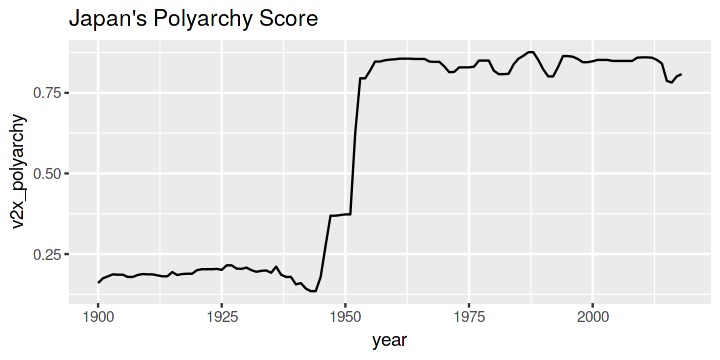

In [95]:
library(ggplot2)

options(repr.plot.width=6, repr.plot.height=3)
select(x, country_name, year, v2x_polyarchy) %>%
  filter(year >= 1900, country_name == "Japan") %>%
  ggplot(aes(year, v2x_polyarchy)) +
  geom_line() +
  ggtitle("Japan's Polyarchy Score")

## 複数の国の折れ線グラフ

複数の国のグラフを同じ図の中に描画し、色や線の形で差をつける場合、国を表す`country_name`を`color`, `linetype`といった`aes`要素として指定します。

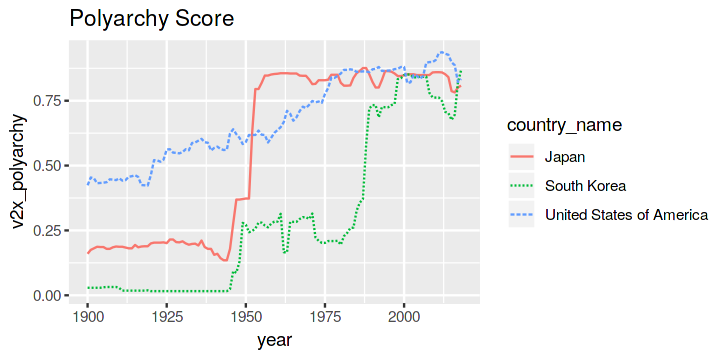

In [91]:
options(repr.plot.width=6, repr.plot.height=3)
select(x, country_name, year, v2x_polyarchy) %>%
  filter(year >= 1900, country_name %in% c("Japan", "United States of America", "South Korea")) %>%
  ggplot(aes(year, v2x_polyarchy,
             color=country_name, linetype=country_name)) +
  geom_line() +
  ggtitle("Polyarchy Score")

## 国ごとに別のパネル

国ごとにパネルを分けたい場合、`facet_wrap`関数を用いてパネルを分ける基準となる変数を指定します。

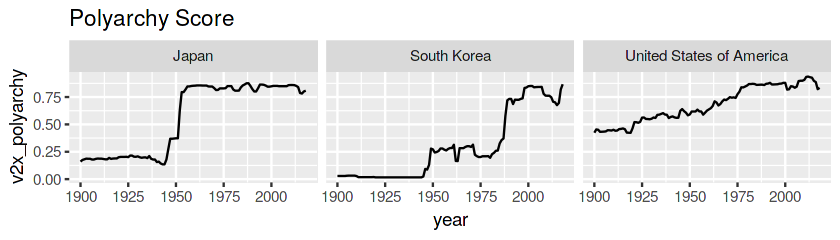

In [96]:
options(repr.plot.width=7, repr.plot.height=2)
select(x, country_name, year, v2x_polyarchy) %>%
  filter(year >= 1900, country_name %in% c("Japan", "United States of America", "South Korea")) %>%
  ggplot(aes(year, v2x_polyarchy)) +
  facet_wrap(vars(country_name)) +
  geom_line() +
  ggtitle("Polyarchy Score")

## 複数の指標を同時にグラフ化する

PolyarchyとLiberal Democracyスコアを同時にグラフに表示することを考えます。この場合、前提としてデータが指標についてLongフォームになっている必要があります。その上で、色が指標の名前により変化すること、縦軸に指標の値をとることを指定します。

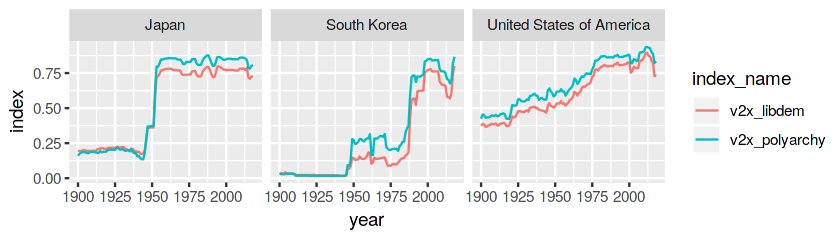

In [98]:
options(repr.plot.width=7, repr.plot.height=2)
select(x, country_name, year, v2x_polyarchy, v2x_libdem) %>%
  filter(year >= 1900, country_name %in% c("Japan", "United States of America", "South Korea")) %>%
  pivot_longer(starts_with("v2x"), names_to="index_name", values_to="index") %>%
  ggplot(aes(year, index, color=index_name)) +
  facet_wrap(vars(country_name)) +
  geom_line()

## 散布図

散布図を描くには、描画手法を `geom_point`に指定します。下の例では、特定の年（2018年）のデータについて、横軸にPolyarchy、縦軸にLiberal Democracyスコアを取っています。

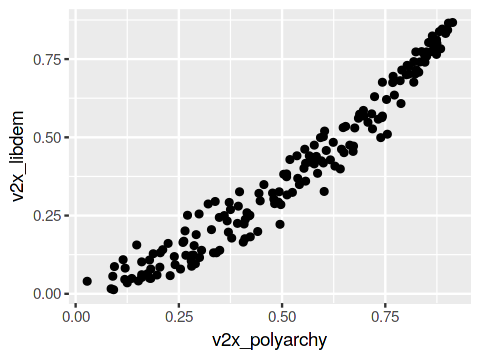

In [108]:
options(repr.plot.width=4, repr.plot.height=3)
select(x, year, v2x_polyarchy, v2x_libdem) %>%
  filter(year == 2018) %>%
  ggplot(aes(v2x_polyarchy, v2x_libdem)) +
  geom_point()

## 地域ごとに色分けする

地域ごとに色分けするには、`region`変数を定義し、それを`color`エステティクスに指定します。

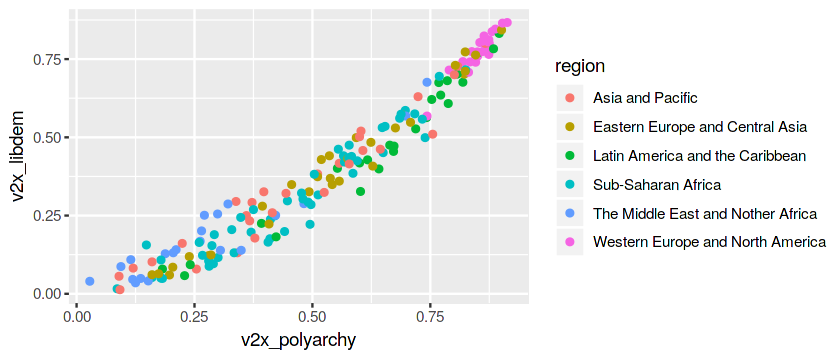

In [120]:
options(repr.plot.width=7, repr.plot.height=3)
select(x, year, v2x_polyarchy, v2x_libdem, e_regionpol_6C) %>%
  filter(year == 2018) %>%
  mutate(region = to_region_name(e_regionpol_6C)) %>%
  ggplot(aes(v2x_polyarchy, v2x_libdem, color=region)) +
  geom_point()

## マーカーの代わりに国の略称を描画する

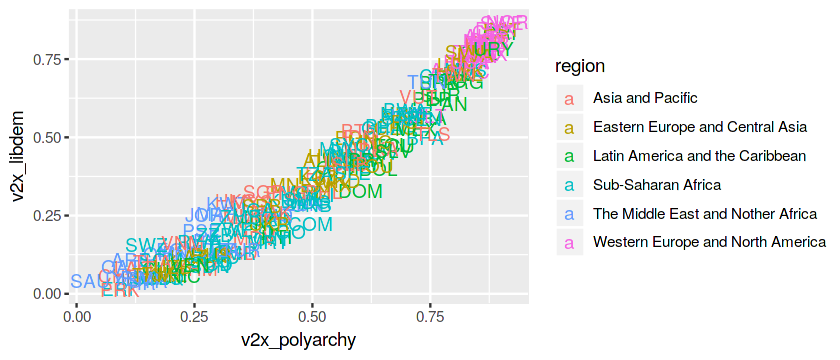

In [121]:
options(repr.plot.width=7, repr.plot.height=3)
select(x, year, country_text_id, v2x_polyarchy, v2x_libdem, e_regionpol_6C) %>%
  filter(year == 2018) %>%
  mutate(region = to_region_name(e_regionpol_6C)) %>%
  ggplot(aes(v2x_polyarchy, v2x_libdem, color=region, label=country_text_id)) +
  geom_text()

## 地域ごとにパネルを分ける

可視化の見やすさとしては、色分けよりも地域ごとにパネルを分けたほうが傾向が見えやすいかもしれません。

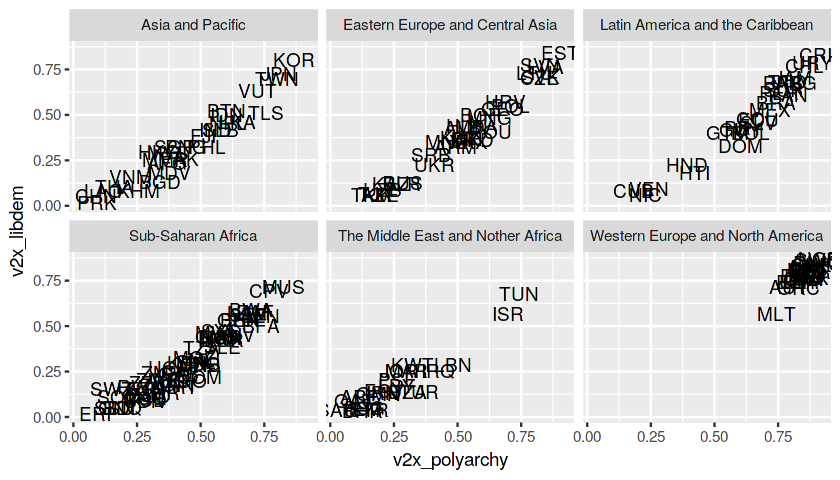

In [122]:
options(repr.plot.width=7, repr.plot.height=4)
select(x, year, country_text_id, v2x_polyarchy, v2x_libdem, e_regionpol_6C) %>%
  filter(year == 2018) %>%
  mutate(region = to_region_name(e_regionpol_6C)) %>%
  ggplot(aes(v2x_polyarchy, v2x_libdem, label=country_text_id)) +
  geom_text() +
  facet_wrap(vars(region))